In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Image
from pytesseract import pytesseract

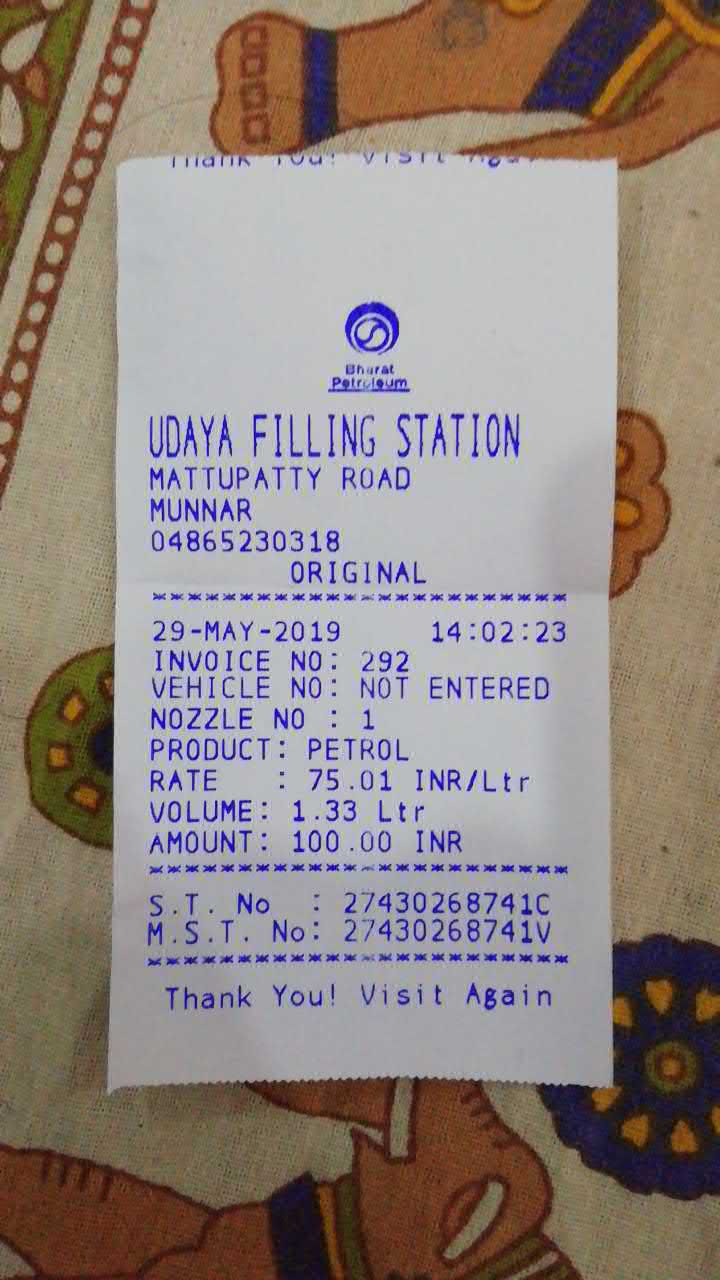

In [3]:
Image(filename='Receipts/0a0ebd53.jpeg')

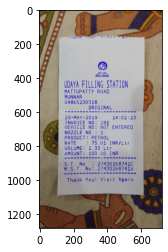

In [8]:
img = cv2.imread("Receipts/0a0ebd53.jpeg")
plt.imshow(img[:,:,::-1])